## Final Project Submission

Please fill out:
* Student name: MARJORIE OPIYO
* Student pace: FULL TIME
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:https://github.com/Opiyow/PHASE-2-PROJECT-KC-HOUSING


## PROBLEM STATEMENT

The average sale price of a home in King County was $815K$  in August 2022, up 5.2% since last year. The average sale price per square foot in King County is $481K$, up 3.2% since last year.

In August 2022, King County home prices were up 5.0% compared to last year, selling for a median price of $815K. On average, homes in King County sell after 15 days on the market compared to 6 days last year. There were 2,744 homes sold in August this year, down from 3,877 last year (https://www.redfin.com/county/118/WA/King-County/housing-market). 

According to MaKe Realtors more houses are sitting on the market longer than previously observed, fewer people are buying homes and home prices in some areas are dropping. Clients are also backing out after viewing and inspecting units for sale. Could this be due to the condition of the units compared to the buying price quoted? 


It is taking MaKe Realtors slightly longer to sell through all the homes for sale at current demand than it would have the previous months,pointing to a less frenzied market.

Sellers who correctly price their homes in today’s market get top-of-market prices.  With this information MakE Realtors hope to optimize their pricing strategies based on the home features that potential home buyers deem crucial.

As the lead data scientist at MaKe, I have been tasked with investigating wgich factors in the dataset have a significant impactt on price and also creating an automated system to estimate the sale price of houses/homesusing the provided features. Estimates from the generated system will be used to predict the house sale prices by the real estate firm.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import folium
%matplotlib inline

## Loading Raw Data

In [2]:
file_path ='/Users/admin/Desktop/phase2_project/dsc-phase-2-project/data/kc_house_data.csv'
data =pd.read_csv(file_path, parse_dates =['date','yr_built','yr_renovated'])
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955-01-01,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951-01-01,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933-01-01,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965-01-01,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987-01-01,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009-01-01,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014-01-01,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009-01-01,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004-01-01,0.0,98027,47.5345,-122.069,1410,1287


The dataset contains 21597 rows and 21 columns. Each row of the dataset contains information about one house.

Our objective is to find a way to estimate the value in the "price" column using the values in the other columns. By achieving this using this set of data, then we should able to estimate prices of other houses too, simply by asking for information like bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement' etc

## Data Preprocessing

In [72]:
#inspecting the columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   condition      21597 non-null  object 
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  int64  
 10  lat            21597 non-null  float64
 11  long           21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.3+ MB


In [5]:
data.drop(['yr_renovated','yr_built', 'zipcode','view'], axis=1, inplace=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0.0,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0.0,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0.0,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0.0,47.5345,-122.069,1410,1287


In [73]:
#desriprive statistics bfor the numeric columns
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.371348,0.902749,1.0000,3.0000,3.0000,4.000,1.000000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
sqft_above,21597.0,1788.596842,827.759761,370.0000,1190.0000,1560.0000,2210.000,9.410000e+03
sqft_basement,21597.0,291.725008,442.667800,0.0000,0.0000,0.0000,560.000,4.820000e+03
lat,21597.0,47.560093,0.138552,47.1559,47.4711,47.5718,47.678,4.777760e+01
long,21597.0,-122.213982,0.140724,-122.5190,-122.3280,-122.2310,-122.125,-1.213150e+02


In [7]:
#check which columns have missing values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#no duplicated rows
data.duplicated().sum()

0

## Data Cleaning

In [9]:
#calculate new column for sqft_basement as the one provided contains place holders '?' and the column is an object 
data['sqft_basement']= data['sqft_living']-data['sqft_above']
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0,47.5345,-122.069,1410,1287


In [10]:
data['waterfront'].unique()
     

array([nan, 'NO', 'YES'], dtype=object)

In [11]:
data['waterfront'].isna().sum()

2376

In [12]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [13]:
data['waterfront'] = data['waterfront'].replace(np.nan,'NO')

In [14]:
data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [15]:
data = data.drop(columns = ['id', 'date', 'grade'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   condition      21597 non-null  object 
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  int64  
 10  lat            21597 non-null  float64
 11  long           21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.3+ MB


# Exploratory Data Analysis
we analyze the variables (with plots and descriptive statistics) and figure out the best predictors of our dependent variable. We'll use ordinary least squares (OLS),to assess our model and we therefore need ton test for the 'LINE' assumptions.


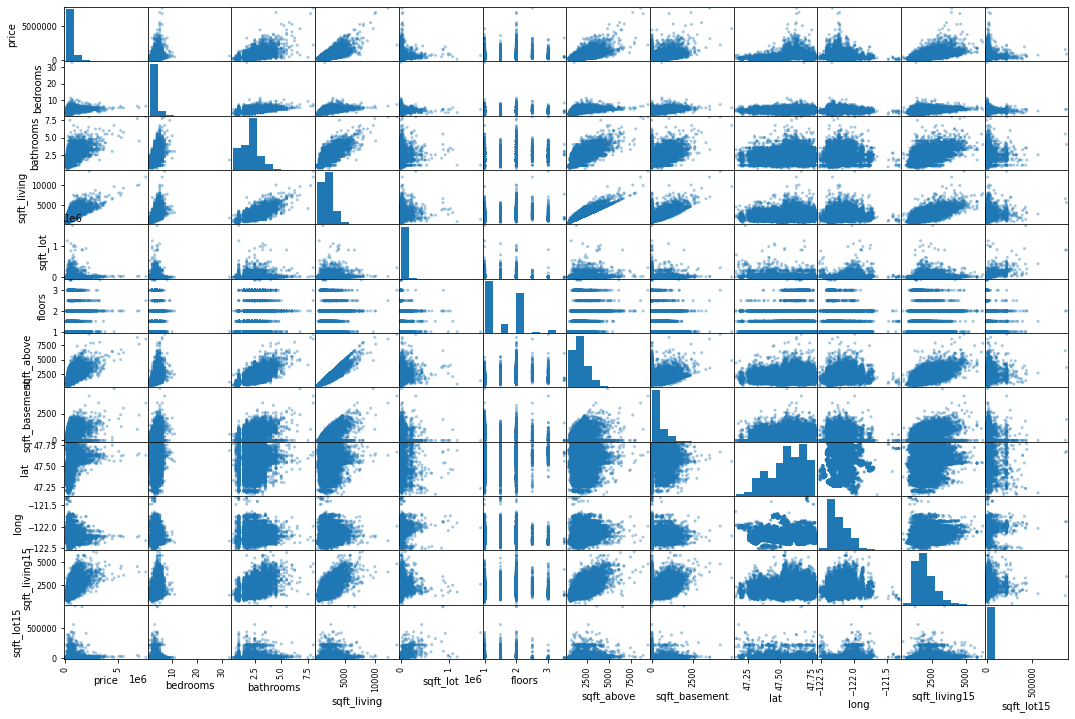

In [17]:
pd.plotting.scatter_matrix(data, figsize=(18,12), alpha=0.4);

In [18]:
# sns.pairplot(data);


## Test for normality
data is slightly skewed to the right

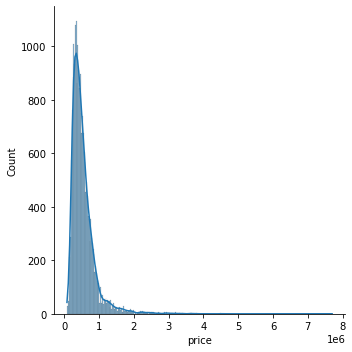

In [19]:
sns.displot(data['price'],kde=True);
#majority of the properties are valued below $1M then the price gets skewed to the right

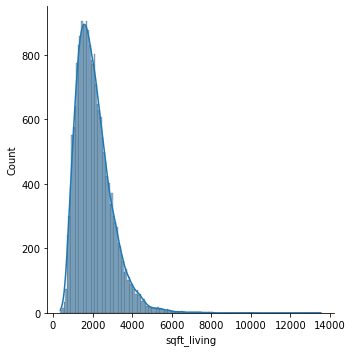

In [20]:
sns.displot(data['sqft_living'],kde=True);

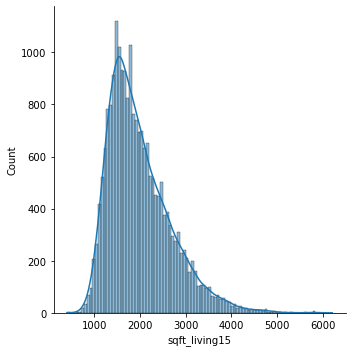

In [21]:
sns.displot(data['sqft_living15'],kde=True);

Despite observed outliers in the datasaet, I chose not to drop them since the dataset represents housing prices which is usually characterised with a lot of variance and discrepancy. It was my personal opinion that dropping extreme values would influence the quality of the analysis

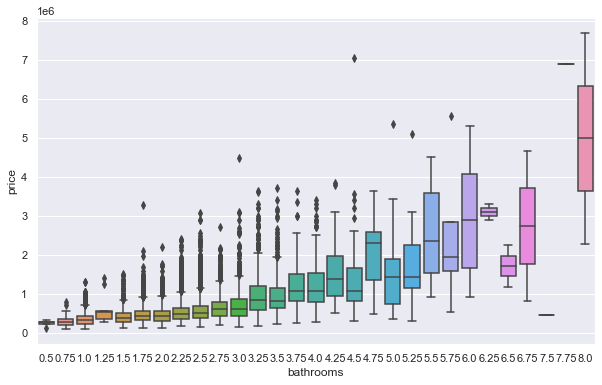

In [22]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=data, x='bathrooms', y='price');

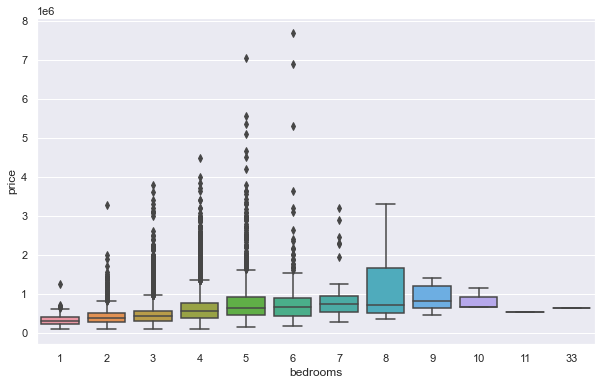

In [23]:
# from the boxplot, it appears that 11 and 33 are oultiers/misplaced values
# i opted to replace the  values by 1 and 3 respectively
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=data, x='bedrooms', y='price');
data['bedrooms']= data['bedrooms'].replace({11:1, 33:3})

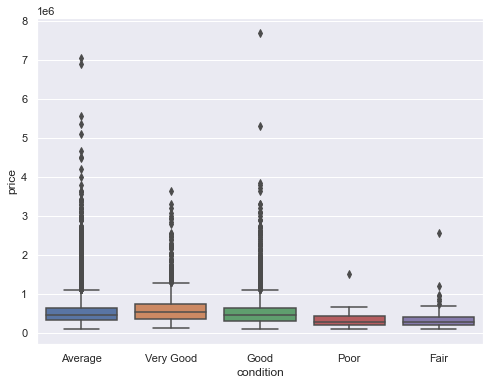

In [24]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(data=data, x='condition', y='price');

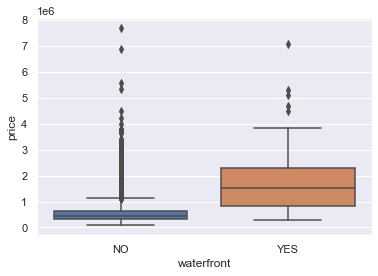

In [25]:
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(data=data, x='waterfront', y='price');

In [27]:
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [28]:
data['condition']

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [29]:
# Q3 = np.quantile(df['logprice'],0.75)
# Q1 = np.quantile(df['logprice'],0.25)
# IQR =Q3-Q1
# lower_range =Q1-1.5*IQR
# upper_range =Q3+1.5*IQR
# df =df[df['logprice']<upper_range]
# df

In [30]:
# df =df[df['logprice']>lower_range]
# df

In [31]:
# df.boxplot(column='logprice');

## Test for Linearity
sqft_living, sqft_above  and sqft_living15  show some degree of linearity with the price of homes but we can observe outliers where we observe low home prices for extreme values of these varibles. This could maybe be explained by these properties maybe being located in peri urban or rural areas thus not fetching high prices despite having large square feet.
We therefore cannot really drop these 'outlier' figure because essentially they define a feature of the dataset.


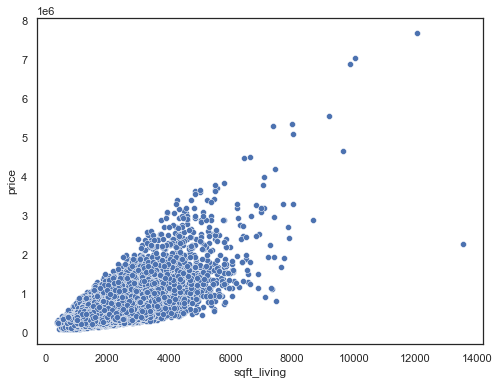

In [32]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('white')
sns.scatterplot(x='sqft_living', y='price',data=data);

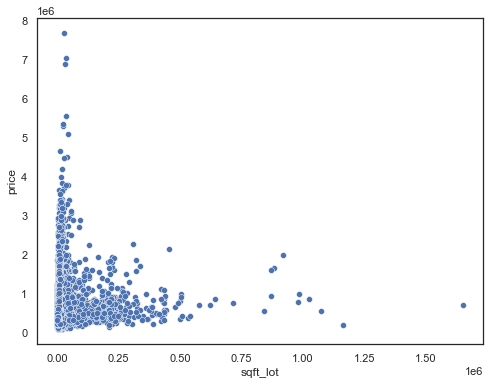

In [33]:
sns.set_style('white')
sns.scatterplot(x='sqft_lot', y='price',data=data);

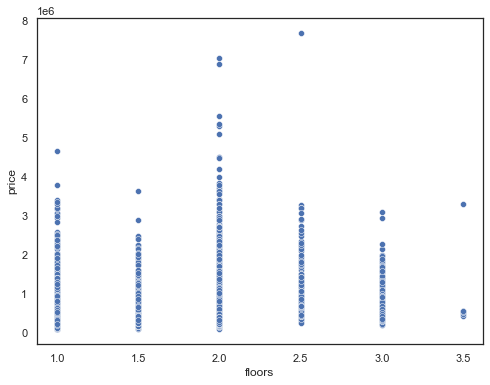

In [34]:
sns.set_style('white')
sns.scatterplot(x='floors', y='price',data=data);

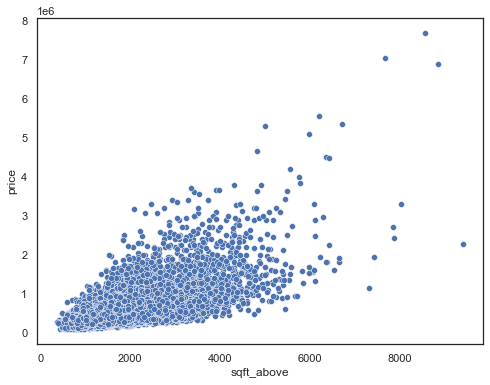

In [35]:
sns.set_style('white')
sns.scatterplot(x='sqft_above', y='price',data=data);

In [36]:
# sns.set_style('white')
# sns.scatterplot(x='sqft_basement', y='price',data=data);

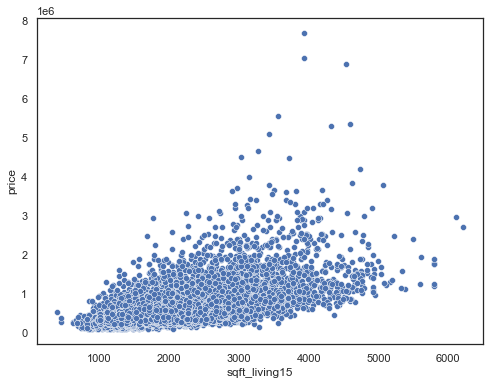

In [37]:
sns.set_style('white')
sns.scatterplot(x='sqft_living15', y='price',data=data);

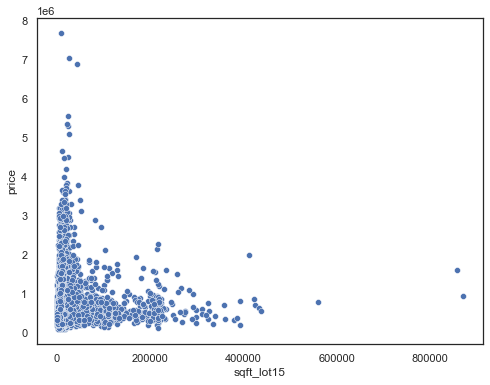

In [38]:
sns.set_style('white')
sns.scatterplot(x='sqft_lot15', y='price',data=data);

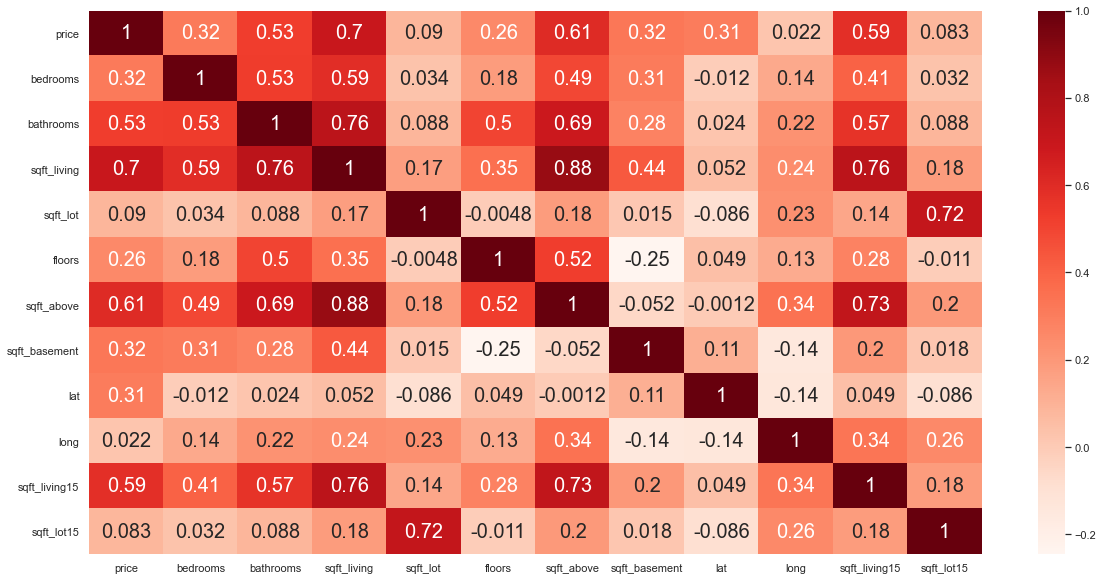

In [74]:
#check for correlation/multicollinearity

corr = data.corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(corr, annot=True, cmap='Reds', annot_kws={'size':20});

In [40]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## LINEAR REGRESSION
For the linear regression model, we first standardized the target variables by subtracting from the mean then dividing by the standard deviation of the specific variable.

In [41]:
df_standardized = data.copy()
df_standardized ['bathrooms']= (df_standardized['bathrooms']-df_standardized['bathrooms'].mean())/df_standardized['bathrooms'].std()
df_standardized ['sqft_above']= (df_standardized['sqft_above']-df_standardized['sqft_above'].mean())/df_standardized['sqft_above'].std()
df_standardized ['sqft_basement']= (df_standardized['sqft_basement']-df_standardized['sqft_basement'].mean())/df_standardized['sqft_basement'].std()
df_standardized ['sqft_lot']= (df_standardized['sqft_lot']-df_standardized['sqft_lot'].mean())/df_standardized['sqft_lot'].std()
df_standardized 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,-1.451039,1180,-0.228177,1.0,NO,Average,-0.735234,-0.659016,47.5112,-122.257,1340,5650
1,538000.0,3,0.174482,2570,-0.189735,2.0,NO,Average,0.460766,0.244596,47.7210,-122.319,1690,7639
2,180000.0,2,-1.451039,770,-0.123137,1.0,NO,Average,-1.230546,-0.659016,47.7379,-122.233,2720,8062
3,604000.0,4,1.149794,1960,-0.243873,1.0,NO,Very Good,-0.892284,1.396702,47.5208,-122.393,1360,5000
4,510000.0,3,-0.150622,1680,-0.169499,1.0,NO,Average,-0.131194,-0.659016,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,0.499586,1530,-0.337298,3.0,NO,Average,-0.312406,-0.659016,47.6993,-122.346,1530,1509
21593,400000.0,4,0.499586,2310,-0.224241,2.0,NO,Average,0.629897,-0.659016,47.5107,-122.362,1830,7200
21594,402101.0,2,-1.776143,1020,-0.332010,2.0,NO,Average,-0.928526,-0.659016,47.5944,-122.299,1020,2007
21595,400000.0,3,0.499586,1600,-0.306945,2.0,NO,Average,-0.227840,-0.659016,47.5345,-122.069,1410,1287


In [42]:
df_standardized = df_standardized.drop(['bedrooms','sqft_living', 'lat', 'long','sqft_living15', 'sqft_lot15'], axis =1)
df_standardized

,price,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement
0,221900.0,-1.451039,-0.228177,1.0,NO,Average,-0.735234,-0.659016
1,538000.0,0.174482,-0.189735,2.0,NO,Average,0.460766,0.244596
2,180000.0,-1.451039,-0.123137,1.0,NO,Average,-1.230546,-0.659016
3,604000.0,1.149794,-0.243873,1.0,NO,Very Good,-0.892284,1.396702
4,510000.0,-0.150622,-0.169499,1.0,NO,Average,-0.131194,-0.659016
...,...,...,...,...,...,...,...,...
21592,360000.0,0.499586,-0.337298,3.0,NO,Average,-0.312406,-0.659016
21593,400000.0,0.499586,-0.224241,2.0,NO,Average,0.629897,-0.659016
21594,402101.0,-1.776143,-0.332010,2.0,NO,Average,-0.928526,-0.659016
21595,400000.0,0.499586,-0.306945,2.0,NO,Average,-0.227840,-0.659016


In [43]:
# Next was one hot coding for the categorical variables in order to convert them to numerical variables for analysis
#we drop the first dummy in order to avoid the dummy variable trap
df_standardized = pd.get_dummies(data=df_standardized, columns=['waterfront','condition'], drop_first =True)
df_standardized 

,price,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,221900.0,-1.451039,-0.228177,1.0,-0.735234,-0.659016,0,0,0,0,0
1,538000.0,0.174482,-0.189735,2.0,0.460766,0.244596,0,0,0,0,0
2,180000.0,-1.451039,-0.123137,1.0,-1.230546,-0.659016,0,0,0,0,0
3,604000.0,1.149794,-0.243873,1.0,-0.892284,1.396702,0,0,0,0,1
4,510000.0,-0.150622,-0.169499,1.0,-0.131194,-0.659016,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,0.499586,-0.337298,3.0,-0.312406,-0.659016,0,0,0,0,0
21593,400000.0,0.499586,-0.224241,2.0,0.629897,-0.659016,0,0,0,0,0
21594,402101.0,-1.776143,-0.332010,2.0,-0.928526,-0.659016,0,0,0,0,0
21595,400000.0,0.499586,-0.306945,2.0,-0.227840,-0.659016,0,0,0,0,0


In [44]:
Xs= df_standardized['sqft_above'].values
y=y=df_standardized ['price'].values

In [45]:
#run the simple regression model which will be our base model
model = sm.OLS(y, sm.add_constant(Xs))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:02:51   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1989.749    271.540      0.0

Overall the model is significant and explains 36.6% of the variance in house prices. A change in one standard deviation in square foot above results to a corresponding  222,400 increase in price. When the house has no square foot above(probably only basement) the price charged will be  540,300.

## Multiple Regression

In [46]:
# feature variables = bathrooms, sqft_lot, floors, waterfront, condition, sqft_above, sqft_basement
X = df_standardized.drop(['price'],axis=1).values
y=df_standardized ['price'].values

In [47]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2509.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:02:51   Log-Likelihood:            -2.9906e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21586   BIC:                         5.982e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.736e+05   6945.920     68.177      0.0

Overall the model is significant and explains 53.7% (adjusted R-squared) of the variance in house prices. A change in one standard deviation in square foot lot results to a corresponding  11,400 drop in house price, A change in one standard deviation in the number of floors results to a corresponding  28,360 increase in price, A change in one standard deviation in the square foot above results to a corresponding  226,400 increase in price. A change in one standard deviation in the square foot basement results to a corresponding  125,100 increase in price.
A change in one standard deviation in WaterFront results to a corresponding  856,300 increase in price.
A one unit change  in Good Condition results to a corresponding  38,620 increase in price compared to Average conditions.
A one unit change  in Very Good Condition results to a corresponding  106,700 increase in price compared to Average conditions.

Comparing these 10 variables, we can conclude that WaterFront,Very Good Condition, square foot above,square foot basement have the most important impact on house prices because they have the largest coefficients.

## Model Prediction

In this section, we will split the data into x and y variables, run a linear regression and also random forests owing to the nature of data observed from the scatter plots. The data has outliers that we really cannot drop and therefore using OLS might lead to the line of best fit being affected by outliers.

Since we have a a positively skewed distribution, we will use log transformation to pull outlying data closer to the bulk of the data, in order to make the y variable normally distributed. 

In [48]:
X = data.drop(columns = ['price','condition','waterfront'])
y= np.log(data['price'])


### Splitting Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

I have split the data into the training part and the testing part. Inside the train_test_split() method, I define the test_size to 0.3, that is, assigning 30% of the housing data set to the testing variables and 70% to the training variables.

The random_state means that the splitting of the data set into training and test part will be random and the same results will be the same everytime the code is run.The data is trained to predict a line and then the test data is used to see if the line fits perfectly or not.

### Multiple Linear Regression 

In [50]:
lm =LinearRegression()
lm.fit(X_train,y_train) #training the algorithm

LinearRegression()

In [51]:
y_pred =lm.predict(X_train)

## Performance evaluation

In [52]:
print(lm.intercept_)


print(lm.coef_)

-110.35536296474137
[-3.50731982e-02  5.47849365e-02  1.83043194e-04  5.48836325e-07
  4.52635207e-02  8.55955891e-05  9.74476057e-05  1.49862973e+00
 -4.18335586e-01  1.86180618e-04 -3.19674004e-07]


In [53]:
print('R_squared:', metrics.r2_score(y_train,y_pred))
print('Adjusted_Rsquared:', 1-(1-metrics.r2_score(y_train,y_pred))*(len(y) - 1)/(len(y) - X.shape[1] - 1 ))
print('MAE:' , metrics.mean_absolute_error(y_train,y_pred))
print('MSE:' , metrics.mean_squared_error(y_train,y_pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R_squared: 0.6894426692093032
Adjusted_Rsquared: 0.6892844051074409
MAE: 0.22880054649804624
MSE: 0.0867705720707068
RMSE: 0.294568450569145


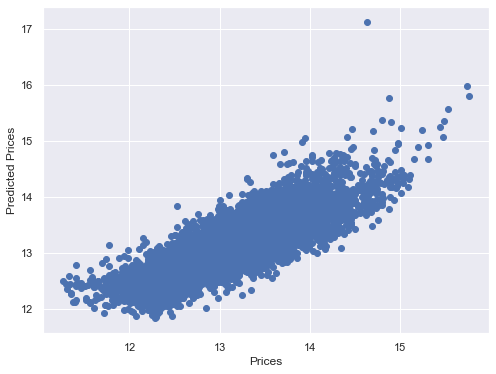

In [54]:
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices');


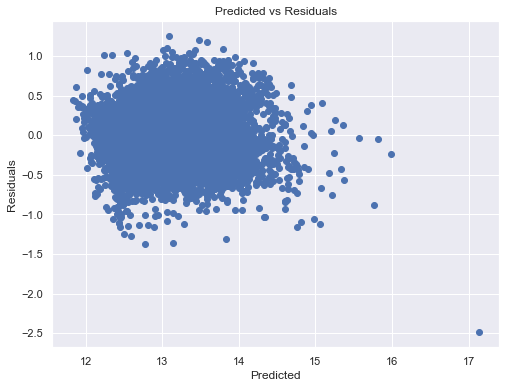

In [55]:
## Plotting Residual
r=y_train-y_pred
plt.scatter(y_pred,r)
plt.title('Predicted vs Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals');

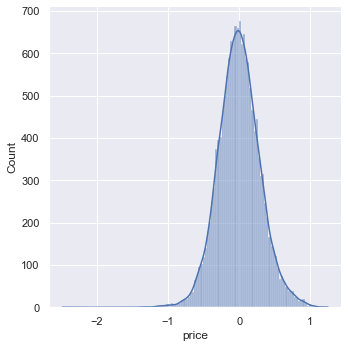

In [56]:
sns.displot(r, kde=True); 

In [57]:
y_test_pred =lm.predict(X_test)

In [58]:
r_squared = metrics.r2_score(y_test,y_test_pred)
print('R_squared:', r_squared)
print('Adjusted_Rsquared:', 1-(1-r_squared)*(len(y) - 1)/(len(y) - X.shape[1] - 1 ))
print('MAE:' , metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:' , metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

R_squared: 0.6921550663488557
Adjusted_Rsquared: 0.6919981845202635
MAE: 0.22734606434542587
MSE: 0.08379957220650695
RMSE: 0.2894815576276094


The R squared and adjusted R squared are almost the same indicating how well the set  of independent variables  explains the dependent variable.

In [71]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df.head(10)

,Actual,Predicted
19317,12.574182,12.564084
13025,13.122363,13.378514
9602,12.765688,12.971486
9727,12.584509,12.784066
1088,12.860999,12.779077
4559,11.512925,12.486547
20049,13.071070,13.044527
9950,12.994530,13.049376
8684,13.231756,12.975431
10269,13.217674,13.126816


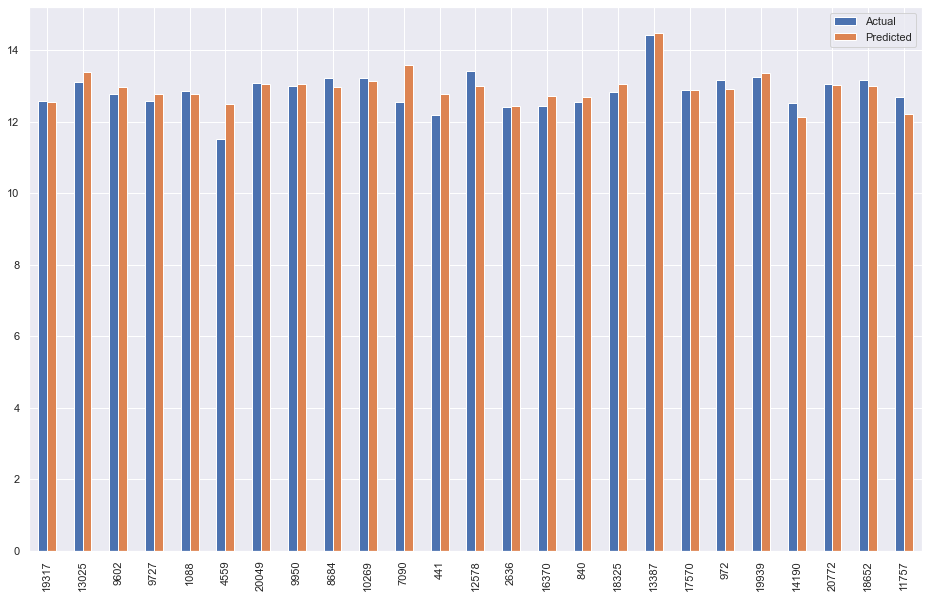

In [60]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

### RandomForest

In [61]:
# class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', 
#                             max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                             max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
#         oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [62]:
regr= RandomForestRegressor()

regr.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
y_pred2 = regr.predict(X_train)

print('R_squared:', metrics.r2_score(y_train,y_pred2))
print('Adjusted_Rsquared:', 1-(1-metrics.r2_score(y_train,y_pred2))*(len(y) - 1)/(len(y) - X.shape[1] - 1 ))
print('MAE:' , metrics.mean_absolute_error(y_train,y_pred2))
print('MSE:' , metrics.mean_squared_error(y_train,y_pred2))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_train,y_pred2)))

R_squared: 0.9795537574068869
Adjusted_Rsquared: 0.9795433377326443
MAE: 0.05172999927938307
MSE: 0.0057127363955113706
RMSE: 0.07558264612668288


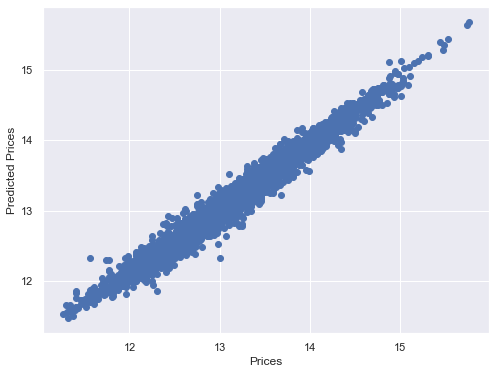

In [64]:
plt.scatter(y_train, y_pred2)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices');

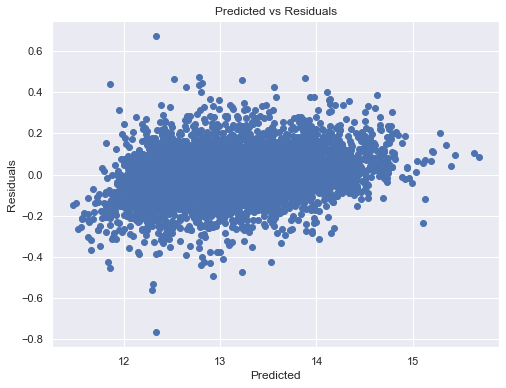

In [65]:
## Plotting Residual
r2=(y_train-y_pred2)
plt.scatter(y_pred2,r2)
plt.title('Predicted vs Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals');

In [66]:
y_test_predic = regr.predict(X_test)

In [67]:
act_linreg = metrics.r2_score(y_test, y_test_predic)
print('R_squared:', act_linreg)
print('Adjusted_Rsquared:', 1-(1-metrics.r2_score(y_test, y_test_predic))*(len(y_test) - 1)/(len(y_test) - X.shape[1] - 1 ))
print('MAE:' , metrics.mean_absolute_error(y_test, y_test_predic))
print('MSE:' , metrics.mean_squared_error(y_test, y_test_predic))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test, y_test_predic)))

R_squared: 0.8655569255328107
Adjusted_Rsquared: 0.8653282808483427
MAE: 0.13681944137471597
MSE: 0.03659723092680542
RMSE: 0.19130402747147124


### Model Precision
How precise is our model? When our linear regression model makes a prediction of the expected house prices, it is actually precise 86.50% of the time. In the table below we compare actual prices against those predicted by our model.

In [70]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predic})
df1.head(10)

,Actual,Predicted
19317,12.574182,12.483632
13025,13.122363,13.179704
9602,12.765688,12.917211
9727,12.584509,12.562949
1088,12.860999,12.748883
4559,11.512925,12.320799
20049,13.071070,13.144484
9950,12.994530,13.084057
8684,13.231756,13.309617
10269,13.217674,13.393457


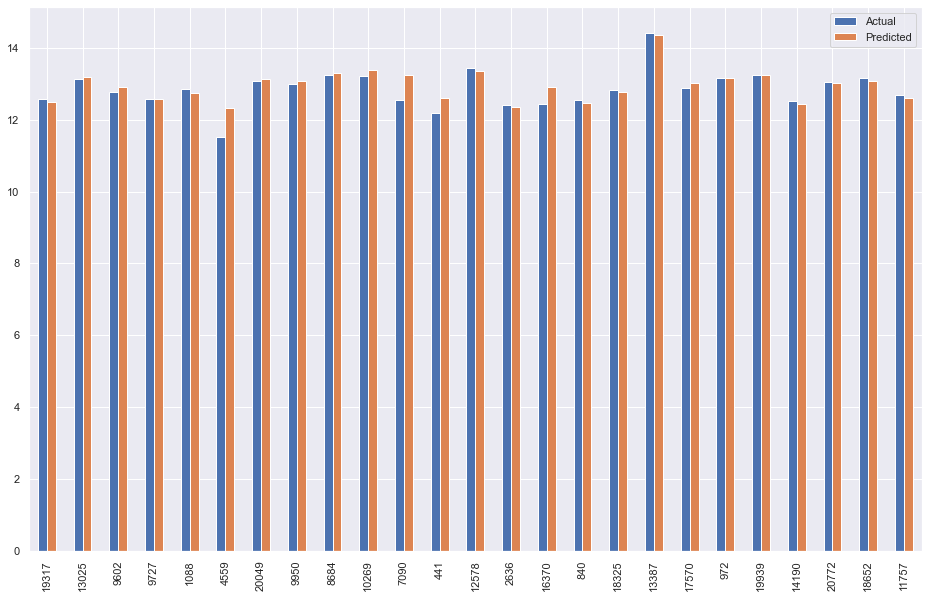

In [69]:
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.show()

### Accuracy
How accurate is our model?. 

When the model makes a prediction, what is the estimation for the expected error? 

In our prediction case, when our Random Forest regression model makes a prediction of the expected house prices, that model is wrong in ±19.2%. (RMSE: 0.19159876517414015)

### Observation and Conclusion

Results show that waterfront properties have the highest impact on price. This could be due to the lifestyle that is associated with such properties. The high significance could also be due to the fact Waterfront homes are often cited as "recession-resistant" because the property will usually grow in value and can be less prone to market downturns than nearby landlocked equivalent.

Houses in Very Good Condition had the largest positive impact on Price.Typically, homes that are newer appraise at a higher value.

A home’s usable space (above) however had much more significance than basement space.Livable space is what is most important to buyers and appraisers

Multiple Linear Regression gives us an adjusted R-squared (testing) score of 0.6903 while the Random Forest adjusted R-squared is  0.8649. A comparison of the two models shows that the Random Forest Regressor has a lower RMSE and higher adjusted R-squared, thus it outperforms the Linear Regression model.

# RECOMMENDATIONS

1. #### Consider increasing waterfront homes for sale in the portfolio. 

Results show that waterfront properties have the highest impact on price. This could be due to the lifestyle that is associated with such properties. The high significance could also be due to the fact Waterfront homes are often cited as "recession-resistant" because the property will usually grow in value and can be less prone to market downturns than nearby landlocked equivalent


2. #### The bigger square foot the better.

The value of a home is roughly estimated in price per square foot(above and basement).A home’s usable space (above) however had much more significance than basement space.Livable space is what is most important to buyers and appraisers. In this case, incase the firm is constructing houses for sale, priority should be given to the space above over the basement space. 


3. #### Condition of the House.

Houses in Very Good Condition had the largest positive impact on Price. Typically, homes that are newer appraise at a higher value. It is therefore recommended that MaKe Realtors updates and upgrades and maintain houses already in the market to add value, especially in older homes that may have outdated features